In [1]:
#!pip install pandas-profiling

In [2]:
import pandas as pd
import numpy as np
#import pandas_profiling
import sys
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt

# importing data set

In [3]:
Train_df= pd.read_excel('Data_Train.xlsx')

In [4]:
Train_df.head(5)

Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1    Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways       9/06/2019     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      12/05/2019   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      01/03/2019  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662  
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882  
3    18:05         23:30   5h 25m      1 stop         No info   6218  
4    16:50         21:35   4h 45m      1 stop         No info  13302

In [5]:
(Train_df.shape)

(10683, 11)

In [6]:
Train_df.describe()

Price
count  10683.000000
mean    9087.064121
std     4611.359167
min     1759.000000
25%     5277.000000
50%     8372.000000
75%    12373.000000
max    79512.000000

In [7]:
Train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [8]:
Train_df["Duration"].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [9]:
Train_df.dropna(inplace=True)

Train_df.isnull().sum()

In [10]:
from pandas_profiling import ProfileReport

# EDA

In [11]:
Train_df.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897  
1    05:50         13:15   7h 25m     2 stops         No info   7662

In [12]:
Train_df["Journey_day"] = pd.to_datetime(Train_df.Date_of_Journey, format="%d/%m/%Y").dt.day

In [13]:
Train_df["Journey_month"] = pd.to_datetime(Train_df["Date_of_Journey"], format = "%d/%m/%Y").dt.month

In [14]:
from datetime import datetime

In [15]:
Train_df.head(2)

Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      24/03/2019  Banglore   New Delhi              BLR → DEL   
1  Air India       1/05/2019   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   

   Journey_day  Journey_month  
0           24              3  
1            1              5

In [16]:
Train_df.drop(["Date_of_Journey"],axis=1,inplace=True)

In [17]:
# Departure time is when a plane leaves the gate. 
# Similar to Date_of_Journey we can extract values from Dep_Time

# Extracting Hours
Train_df["Dep_hour"] = pd.to_datetime(Train_df["Dep_Time"]).dt.hour

# Extracting Minutes
Train_df["Dep_min"] = pd.to_datetime(Train_df["Dep_Time"]).dt.minute

# Now we can drop Dep_Time as it is of no use
Train_df.drop(["Dep_Time"], axis = 1, inplace = True)

In [18]:
# Arrival time is when the plane pulls up to the gate.
# Similar to Date_of_Journey we can extract values from Arrival_Time

# Extracting Hours
Train_df["Arrival_hour"] = pd.to_datetime(Train_df.Arrival_Time).dt.hour

# Extracting Minutes
Train_df["Arrival_min"] = pd.to_datetime(Train_df.Arrival_Time).dt.minute

# Now we can drop Arrival_Time as it is of no use
Train_df.drop(["Arrival_Time"], axis = 1, inplace = True)

In [19]:
Train_df.head(2)

Airline    Source Destination                  Route Duration  \
0     IndiGo  Banglore   New Delhi              BLR → DEL   2h 50m   
1  Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR   7h 25m   

  Total_Stops Additional_Info  Price  Journey_day  Journey_month  Dep_hour  \
0    non-stop         No info   3897           24              3        22   
1     2 stops         No info   7662            1              5         5   

   Dep_min  Arrival_hour  Arrival_min  
0       20             1           10  
1       50            13           15

In [20]:
len("2h 50m".split())

2

In [21]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(Train_df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [22]:
# Adding duration_hours and duration_mins list to train_data dataframe

Train_df["Duration_hours"] = duration_hours
Train_df["Duration_mins"] = duration_mins

In [23]:
Train_df.drop(["Duration"], axis = 1, inplace = True)

In [24]:
Train_df.head(3)

Airline    Source Destination                  Route Total_Stops  \
0       IndiGo  Banglore   New Delhi              BLR → DEL    non-stop   
1    Air India   Kolkata    Banglore  CCU → IXR → BBI → BLR     2 stops   
2  Jet Airways     Delhi      Cochin  DEL → LKO → BOM → COK     2 stops   

  Additional_Info  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0         No info   3897           24              3        22       20   
1         No info   7662            1              5         5       50   
2         No info  13882            9              6         9       25   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  
0             1           10               2             50  
1            13           15               7             25  
2             4           25              19              0

# Heading Categorical


we can find many ways to handle categorical data. Some of them categorical data are,

Nominal data --> data are not in any order --> OneHotEncoder is used in this case Ordinal data --> data are in order --> LabelEncoder is used in this case


In [25]:
Train_df["Airline"].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

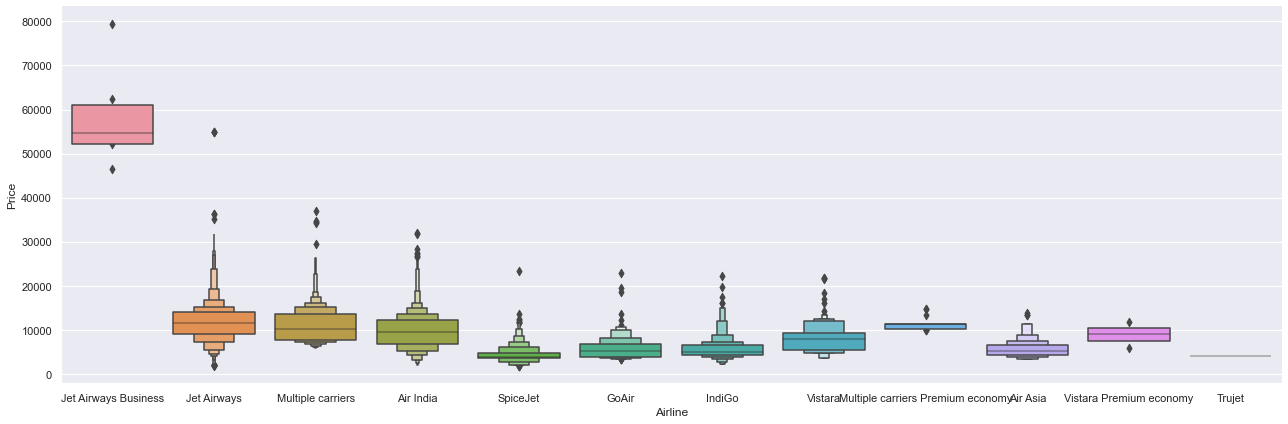

In [41]:
# From graph we can see that Jet Airways Business have the highest Price.
# Apart from the first Airline almost all are having similar median

# Airline vs Price
sns.catplot(y = "Price", x = "Airline", data = Train_df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()



In [27]:
# As Airline is Nominal Categorical data we will perform OneHotEncoding

Airline = Train_df["Airline"]

Airline = pd.get_dummies(Airline, drop_first= True)

Airline.head()

Air India  GoAir  IndiGo  Jet Airways  Jet Airways Business  \
0          0      0       1            0                     0   
1          1      0       0            0                     0   
2          0      0       0            1                     0   
3          0      0       1            0                     0   
4          0      0       1            0                     0   

   Multiple carriers  Multiple carriers Premium economy  SpiceJet  Trujet  \
0                  0                                  0         0       0   
1                  0                                  0         0       0   
2                  0                                  0         0       0   
3                  0                                  0         0       0   
4                  0                                  0         0       0   

   Vistara  Vistara Premium economy  
0        0                        0  
1        0                        0  
2        0                        0  
3        0                        0  
4        0                        0

In [28]:
Train_df["Source"].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

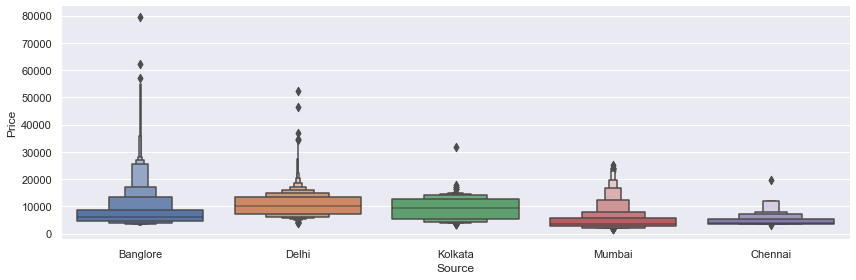

In [29]:
sns.catplot(y = "Price", x = "Source", data = Train_df.sort_values("Price", ascending = False), kind="boxen", height = 4, aspect = 3)
plt.show()



In [30]:
# As Source is Nominal Categorical data we will perform OneHotEncoding

Source = Train_df[["Source"]]

Source = pd.get_dummies(Source, drop_first= True)

Source.head()

Source_Chennai  Source_Delhi  Source_Kolkata  Source_Mumbai
0               0             0               0              0
1               0             0               1              0
2               0             1               0              0
3               0             0               1              0
4               0             0               0              0

In [31]:
Train_df["Destination"].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [32]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = Train_df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

Destination_Cochin  Destination_Delhi  Destination_Hyderabad  \
0                   0                  0                      0   
1                   0                  0                      0   
2                   1                  0                      0   
3                   0                  0                      0   
4                   0                  0                      0   

   Destination_Kolkata  Destination_New Delhi  
0                    0                      1  
1                    0                      0  
2                    0                      0  
3                    0                      0  
4                    0                      1

In [33]:
Train_df["Route"]

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [34]:
# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other

Train_df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

In [35]:
Train_df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [36]:
#profile = ProfileReport(data, title='Flight Price Model Profile', html={'style':{'full_width':True}})

In [37]:
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport

#df = pd.DataFrame(np.random.rand(100, 5), columns=["a", "b", "c", "d", "e"])

In [38]:
profile = ProfileReport(Train_df, title="Pandas Profiling Report",html={'style':{'full_width':True}})

In [46]:
profile

## Concatenate dataframe --> train_data + Airline + Source + Destination

In [48]:
# As this is case of Ordinal Categorical type we perform LabelEncoder
# Here Values are assigned with corresponding keys

Train_df.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [49]:
Train_df.head()

Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  Arrival_min  \
0              3        22       20             1           10   
1              5         5       50            13           15   
2              6         9       25             4           25   
3              5        18        5            23           30   
4              3        16       50            21           35   

   Duration_hours  Duration_mins  
0               2             50  
1               7             25  
2              19              0  
3               5             25  
4               4             45

In [51]:
data_train = pd.concat([Train_df, Airline, Source, Destination], axis = 1)

In [52]:


data_train.head()



Airline    Source Destination  Total_Stops  Price  Journey_day  \
0       IndiGo  Banglore   New Delhi            0   3897           24   
1    Air India   Kolkata    Banglore            2   7662            1   
2  Jet Airways     Delhi      Cochin            2  13882            9   
3       IndiGo   Kolkata    Banglore            1   6218           12   
4       IndiGo  Banglore   New Delhi            1  13302            1   

   Journey_month  Dep_hour  Dep_min  Arrival_hour  ...  \
0              3        22       20             1  ...   
1              5         5       50            13  ...   
2              6         9       25             4  ...   
3              5        18        5            23  ...   
4              3        16       50            21  ...   

   Vistara Premium economy  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                        0               0             0               0   
1                        0               0             0               1   
2                        0               0             1               0   
3                        0               0             0               1   
4                        0               0             0               0   

   Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0              0                   0                  0   
1              0                   0                  0   
2              0                   1                  0   
3              0                   0                  0   
4              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 33 columns]

In [53]:
data_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

In [54]:


data_train.head()



Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  ...  \
0             1           10               2             50  ...   
1            13           15               7             25  ...   
2             4           25              19              0  ...   
3            23           30               5             25  ...   
4            21           35               4             45  ...   

   Vistara Premium economy  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                        0               0             0               0   
1                        0               0             0               1   
2                        0               0             1               0   
3                        0               0             0               1   
4                        0               0             0               0   

   Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0              0                   0                  0   
1              0                   0                  0   
2              0                   1                  0   
3              0                   0                  0   
4              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 30 columns]

In [56]:
data_train.shape

(10682, 30)

## Test set

In [62]:
test_data = pd.read_excel("Test_set.xlsx")

In [63]:
test_data.head()

Airline Date_of_Journey    Source Destination            Route  \
0        Jet Airways       6/06/2019     Delhi      Cochin  DEL → BOM → COK   
1             IndiGo      12/05/2019   Kolkata    Banglore  CCU → MAA → BLR   
2        Jet Airways      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
3  Multiple carriers      21/05/2019     Delhi      Cochin  DEL → BOM → COK   
4           Air Asia      24/06/2019  Banglore       Delhi        BLR → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops              Additional_Info  
0    17:30  04:25 07 Jun  10h 55m      1 stop                      No info  
1    06:20         10:20       4h      1 stop                      No info  
2    19:15  19:00 22 May  23h 45m      1 stop  In-flight meal not included  
3    08:00         21:00      13h      1 stop                      No info  
4    23:55  02:45 25 Jun   2h 50m    non-stop                      No info

In [64]:

# Preprocessing

print("Test data Info")
print("-"*75)
print(test_data.info())

print()
print()
print("Null values :")
print("-"*75)
test_data.dropna(inplace = True)
print(test_data.isnull().sum())

# EDA

# Date_of_Journey
test_data["Journey_day"] = pd.to_datetime(test_data.Date_of_Journey, format="%d/%m/%Y").dt.day
test_data["Journey_month"] = pd.to_datetime(test_data["Date_of_Journey"], format = "%d/%m/%Y").dt.month
test_data.drop(["Date_of_Journey"], axis = 1, inplace = True)

# Dep_Time
test_data["Dep_hour"] = pd.to_datetime(test_data["Dep_Time"]).dt.hour
test_data["Dep_min"] = pd.to_datetime(test_data["Dep_Time"]).dt.minute
test_data.drop(["Dep_Time"], axis = 1, inplace = True)

# Arrival_Time
test_data["Arrival_hour"] = pd.to_datetime(test_data.Arrival_Time).dt.hour
test_data["Arrival_min"] = pd.to_datetime(test_data.Arrival_Time).dt.minute
test_data.drop(["Arrival_Time"], axis = 1, inplace = True)

# Duration
duration = list(test_data["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

# Adding Duration column to test set
test_data["Duration_hours"] = duration_hours
test_data["Duration_mins"] = duration_mins
test_data.drop(["Duration"], axis = 1, inplace = True)

Test data Info
---------------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB
None


Null values :
---------------------------------------------------------------------------
Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time         

In [65]:
# Categorical data

print("Airline")
print("-"*75)
print(test_data["Airline"].value_counts())
Airline = pd.get_dummies(test_data["Airline"], drop_first= True)

print()

print("Source")
print("-"*75)
print(test_data["Source"].value_counts())
Source = pd.get_dummies(test_data["Source"], drop_first= True)

print()

print("Destination")
print("-"*75)
print(test_data["Destination"].value_counts())
Destination = pd.get_dummies(test_data["Destination"], drop_first = True)

# Additional_Info contains almost 80% no_info
# Route and Total_Stops are related to each other
test_data.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

# Replacing Total_Stops
test_data.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

# Concatenate dataframe --> test_data + Airline + Source + Destination
data_test = pd.concat([test_data, Airline, Source, Destination], axis = 1)

data_test.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

print()
print()

print("Shape of test data : ", data_test.shape)

Airline
---------------------------------------------------------------------------
Jet Airways                          897
IndiGo                               511
Air India                            440
Multiple carriers                    347
SpiceJet                             208
Vistara                              129
Air Asia                              86
GoAir                                 46
Multiple carriers Premium economy      3
Vistara Premium economy                2
Jet Airways Business                   2
Name: Airline, dtype: int64

Source
---------------------------------------------------------------------------
Delhi       1145
Kolkata      710
Banglore     555
Mumbai       186
Chennai       75
Name: Source, dtype: int64

Destination
---------------------------------------------------------------------------
Cochin       1145
Banglore      710
Delhi         317
New Delhi     238
Hyderabad     186
Kolkata        75
Name: Destination, dtype: int64


Shape of t

In [66]:
data_test.head()

Total_Stops  Journey_day  Journey_month  Dep_hour  Dep_min  Arrival_hour  \
0            1            6              6        17       30             4   
1            1           12              5         6       20            10   
2            1           21              5        19       15            19   
3            1           21              5         8        0            21   
4            0           24              6        23       55             2   

   Arrival_min  Duration_hours  Duration_mins  Air India  ...  \
0           25              10             55          0  ...   
1           20               4              0          0  ...   
2            0              23             45          0  ...   
3            0              13              0          0  ...   
4           45               2             50          0  ...   

   Vistara Premium economy  Chennai  Delhi  Kolkata  Mumbai  Cochin  Delhi  \
0                        0        0      1        0       0       1      0   
1                        0        0      0        1       0       0      0   
2                        0        0      1        0       0       1      0   
3                        0        0      1        0       0       1      0   
4                        0        0      0        0       0       0      1   

   Hyderabad  Kolkata  New Delhi  
0          0        0          0  
1          0        0          0  
2          0        0          0  
3          0        0          0  
4          0        0          0  

[5 rows x 28 columns]


# Feature Selection

Finding out the best feature which will contribute and have good relation with target variable. Following are some of the feature selection methods,

    heatmap
    feature_importance_
    SelectKBest


In [68]:
data_train.shape



(10682, 30)

In [73]:
data_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi'],
      dtype='object')

In [75]:
X = data_train.loc[:, ['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_hours',
       'Duration_mins', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways',
       'Jet Airways Business', 'Multiple carriers',
       'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara',
       'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi',
       'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin',
       'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata',
       'Destination_New Delhi']]
X.head()

Total_Stops  Price  Journey_day  Journey_month  Dep_hour  Dep_min  \
0            0   3897           24              3        22       20   
1            2   7662            1              5         5       50   
2            2  13882            9              6         9       25   
3            1   6218           12              5        18        5   
4            1  13302            1              3        16       50   

   Arrival_hour  Arrival_min  Duration_hours  Duration_mins  ...  \
0             1           10               2             50  ...   
1            13           15               7             25  ...   
2             4           25              19              0  ...   
3            23           30               5             25  ...   
4            21           35               4             45  ...   

   Vistara Premium economy  Source_Chennai  Source_Delhi  Source_Kolkata  \
0                        0               0             0               0   
1                        0               0             0               1   
2                        0               0             1               0   
3                        0               0             0               1   
4                        0               0             0               0   

   Source_Mumbai  Destination_Cochin  Destination_Delhi  \
0              0                   0                  0   
1              0                   0                  0   
2              0                   1                  0   
3              0                   0                  0   
4              0                   0                  0   

   Destination_Hyderabad  Destination_Kolkata  Destination_New Delhi  
0                      0                    0                      1  
1                      0                    0                      0  
2                      0                    0                      0  
3                      0                    0                      0  
4                      0                    0                      1  

[5 rows x 30 columns]

In [76]:
y = data_train.iloc[:, 1]
y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

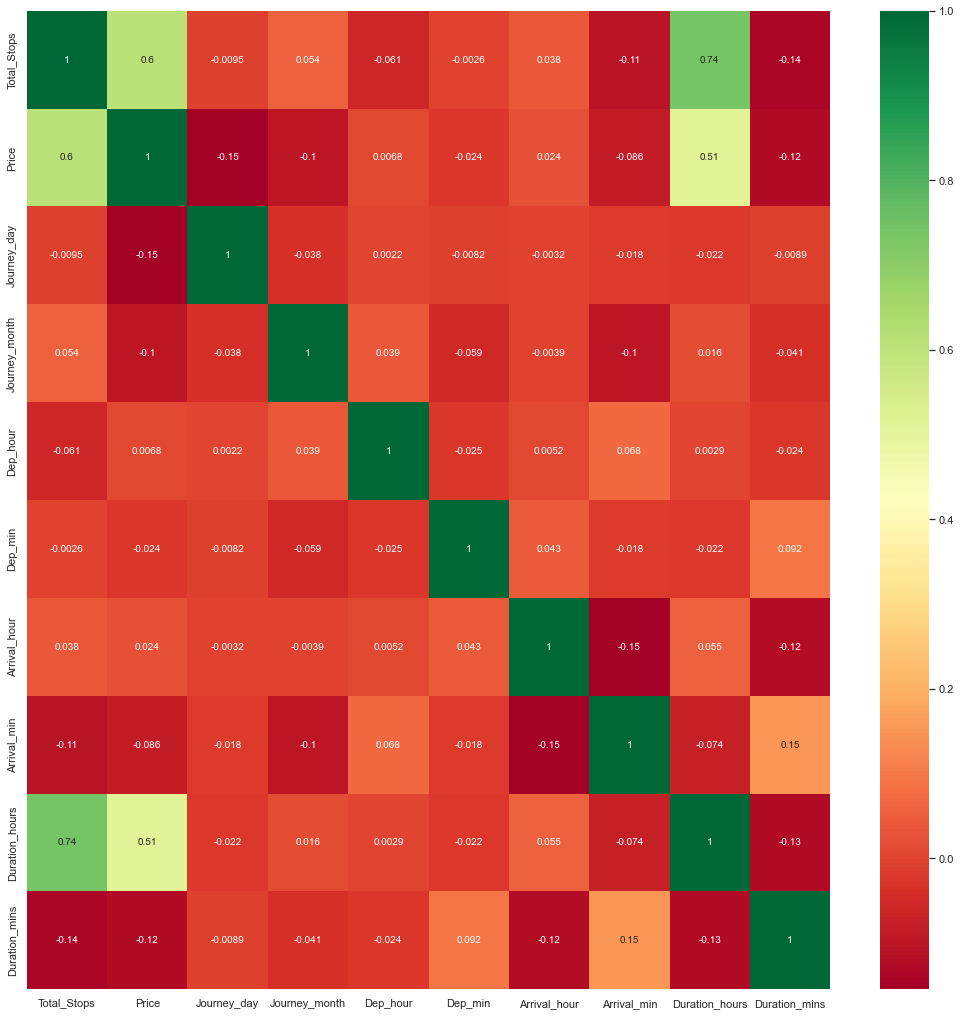

In [79]:
# Finds correlation between Independent and dependent attributes

plt.figure(figsize = (18,18))
sns.heatmap(Train_df.corr(), annot = True, cmap = "RdYlGn")

plt.show()



In [80]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(X, y)

ExtraTreesRegressor()

In [81]:
print(selection.feature_importances_)

[1.45534530e-01 6.05187793e-01 3.79063084e-03 2.67249335e-03
 1.82390599e-04 8.71242705e-05 4.44018744e-04 1.68898980e-04
 9.34396639e-02 3.33317225e-04 7.23669672e-04 1.91297524e-05
 5.14724016e-03 8.54747836e-02 2.86376531e-02 2.87957852e-03
 1.10508285e-05 4.32030169e-04 6.82110042e-09 1.91326792e-04
 2.76542574e-07 2.64102423e-05 4.27906649e-03 3.57373621e-04
 1.50495211e-03 3.45943983e-03 8.02973487e-03 2.02401524e-03
 1.23155058e-05 4.94908590e-03]


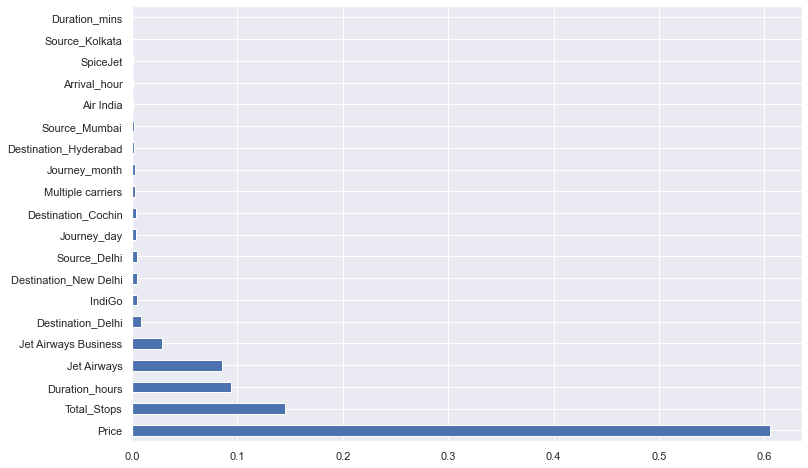

In [82]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(selection.feature_importances_, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()



# Fitting model using Random Forest


    1.Split dataset into train and test set in order to prediction w.r.t X_test
    2.If needed do scaling of data
        Scaling is not done in Random forest
    3.Import model
    4.Fit the data
    5.Predict w.r.t X_test
    6. In regression check RSME Score
    7. Plot graph


In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [84]:
from sklearn.ensemble import RandomForestRegressor
reg_rf = RandomForestRegressor()
reg_rf.fit(X_train, y_train)

RandomForestRegressor()

In [85]:
y_pred = reg_rf.predict(X_test)

In [86]:
reg_rf.score(X_train, y_train)

0.9993359627544124

In [87]:
reg_rf.score(X_test, y_test)

0.9998160420888255

C:\Users\Biswajit Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  """Entry point for launching an IPython kernel.


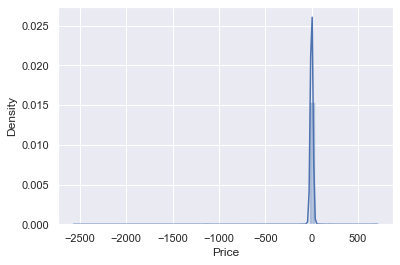

In [88]:
sns.distplot(y_test-y_pred)
plt.show()



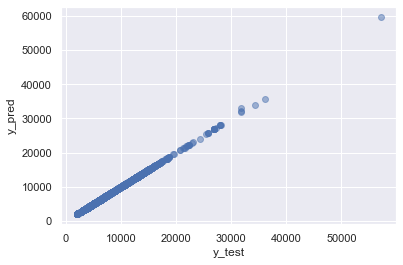

In [89]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()



In [91]:
from sklearn import metrics

In [92]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4.017566682264856
MSE: 3966.510842021532
RMSE: 62.98024167960561


In [93]:
# RMSE/(max(DV)-min(DV))

2090.5509/(max(y)-min(y))

0.026887077025966846

In [94]:
metrics.r2_score(y_test, y_pred)

0.9998160420888255

# hyperparameter Tuning

In [ ]:

    Choose following method for hyperparameter tuning
        1.RandomizedSearchCV --> Fast
        2.GridSearchCV
    Assign hyperparameters in form of dictionery
    Fit the model
    Check best paramters and best score


In [95]:
from sklearn.model_selection import RandomizedSearchCV

In [96]:
#Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [97]:
# Create the random grid

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [98]:
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = reg_rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)





In [99]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   8.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  12.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  11.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [100]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 15,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 20}

In [102]:
prediction = rf_random.predict(X_test)

C:\Users\Biswajit Paul\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  


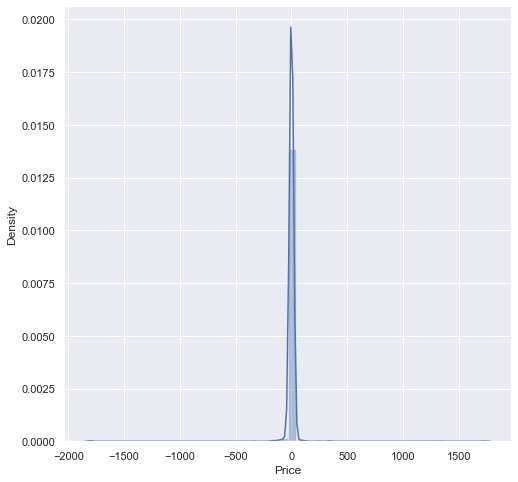

In [103]:

plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()



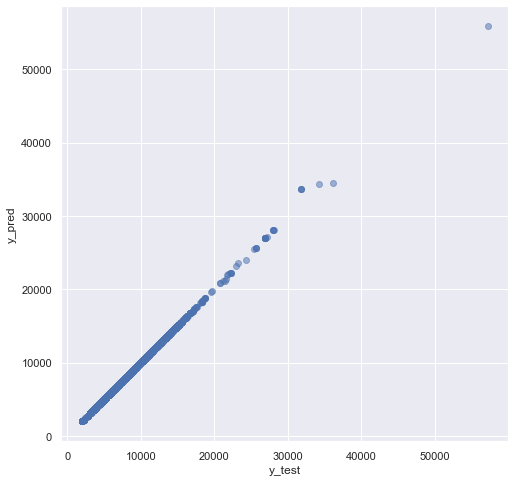

In [104]:
plt.figure(figsize = (8,8))
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()



In [105]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 7.931021401466827
MSE: 7113.1237407209965
RMSE: 84.33933685250908


# save the model to reuse it again

In [106]:
import pickle
# open a file, where you ant to store the data
file = open('flight_rf.pkl', 'wb')

# dump information to that file
pickle.dump(reg_rf, file)

In [108]:
pickle.dump(reg_rf, file)

In [109]:
model = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

FileNotFoundError: [Errno 2] No such file or directory: 'flight_price_rf.pkl'

In [110]:
y_prediction = forest.predict(X_test)

metrics.r2_score(y_test, y_prediction)



NameError: name 'forest' is not defined